# Bioinformatics Project - Computational Drug Discovery - Influenza virus A matrix protein M2 - Extension - Influenza virus A Organism  
Michael Bahchevanov  
***

## Extension Notebook ▶  
This notebook is the **Data Collection**, **Data Preparation**, **Chemical Space Analysis**, and **Feature Engineering** of the extension of the initial project. As we have already discovered and concluded, isolating the *matrix protein M2* provides insufficient data for modelling and drug discovery. This is why we will be looking into *Influenza virus A* as a whole *Organism* not just components. We are looking to drugs not only to combat the virus but protect from the illness it causes.  
Steps in this notebook will not be as thoroughly explained, as we have already undertaken these steps in the previous notebooks. A novelty in this notebook will be the addition of some internel tools I have created to speed the process of cleaning, preparing, and generating descriptors.

### 1. Importing Libraries and Tooling 🔨

In [1]:
import pandas as pd
import numpy as np

from chembl_webresource_client.new_client import new_client

import rdkit
from lib.utils import DataObject

import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

np.random.seed(42)

### 2. Searching and Retrieving the Target Organism 🔎

In [2]:
target = new_client.target
query = target.search('influenza')
targets = pd.DataFrame.from_dict(query)
selected_target = targets.target_chembl_id[2]
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target)
df = pd.DataFrame.from_dict(res)

What we have done here is:  
* Search for influenza
* Putting the results into a DataFrame of targets
* Selecting the Influenza virus A organism (index 2)
* Retrieving the activity
* Saving the activity to a DataFrame of activity towards the Influenza virus A

In [3]:
df.head(10)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,inactive at 100 uM and 1000 uM respectively,32866,[],CHEMBL697077,In vitro antiviral activity against influenza ...,F,None,None,BAO_0000375,BAO_0000218,organism-based format,O=c1ccc2nnc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)...,None,None,CHEMBL1124526,J. Med. Chem.,1989.0,None,CHEMBL3144016,None,CHEMBL3144016,None,False,None,62167,None,1,False,None,None,Activity,None,None,None,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,Activity,None,None,None,None
1,None,41182,[],CHEMBL841083,Compound tested for the antiviral activity aga...,F,None,None,BAO_0000375,BAO_0000218,organism-based format,Nc1ccn([C@@H]2C[C@H](CO)[C@@H](O)[C@@H]2F)c(=O)n1,Potential missing data,"No data provided for value, units or activity_...",CHEMBL1124931,J. Med. Chem.,1990.0,None,CHEMBL2115470,None,CHEMBL2115470,None,False,None,91937,=,1,False,=,None,Activity,None,None,None,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,Activity,None,None,None,None
2,inactive at 100 uM and 1000 uM respectively,42536,[],CHEMBL697077,In vitro antiviral activity against influenza ...,F,None,None,BAO_0000375,BAO_0000218,organism-based format,COc1ccc2nnc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)...,None,None,CHEMBL1124526,J. Med. Chem.,1989.0,None,CHEMBL3144017,None,CHEMBL3144017,None,False,None,62168,None,1,False,None,None,Activity,None,None,None,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,Activity,None,None,None,None
3,inactive at 100 uM and 1000 uM respectively,48624,[],CHEMBL697077,In vitro antiviral activity against influenza ...,F,None,None,BAO_0000375,BAO_0000218,organism-based format,Nc1ccc2nnc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)n2n1,None,None,CHEMBL1124526,J. Med. Chem.,1989.0,None,CHEMBL3144015,None,CHEMBL3144015,None,False,None,62166,None,1,False,None,None,Activity,None,None,None,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,Activity,None,None,None,None
4,inactive at 100 uM and 1000 uM respectively,50071,[],CHEMBL697077,In vitro antiviral activity against influenza ...,F,None,None,BAO_0000375,BAO_0000218,organism-based format,Nc1ccnn2c([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)nnc12,None,None,CHEMBL1124526,J. Med. Chem.,1989.0,None,CHEMBL3144013,None,CHEMBL3144013,None,False,None,62163,None,1,False,None,None,Activity,None,None,None,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,Activity,None,None,None,None
5,inactive at 100 uM and 1000 uM respectively,61461,[],CHEMBL697077,In vitro antiviral activity against influenza ...,F,None,None,BAO_0000375,BAO_0000218,organism-based format,Nc1c(Cl)cnn2c([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3...,None,None,CHEMBL1124526,J. Med. Chem.,1989.0,None,CHEMBL3144019,None,CHEMBL3144019,None,False,None,62164,None,1,False,None,None,Activity,None,None,None,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,Activity,None,None,None,None
6,None,67714,[],CHEMBL841083,Compound tested for the antiviral activity aga...,F,None,None,BAO_0000375,BAO_0000218,organism-based format,Nc1ccn([C@@H]2C[C@H](CO)[C@@H](O)[C@H]2F)c(=O)n1,Potential missing data,"No data provided for value, units or activity_...",CHEMBL1124931,J. Med. Chem.,1990.0,None,CHEMBL2115052,None,CHEMBL2115052,None,False,None,91936,=,1,False,=,None,Activity,None,None,None,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,Activit

Now, we will be saving this dataset to a *.csv* file.

In [4]:
df.to_csv('./data/influenza_01_bioactivity_data_raw.csv', index=False)

### 3. Data Manipulation and Processing

#### 3.1 Handling missing data

We will be using the internal tooling to create a `DataObject` that allows us to chain basic operations to finally produce a DataFrame that has been processed via the `data` attribute of the `DataObject` class.

In [5]:
do = DataObject(df)
do = do.filter_non_smiles().drop_duplicate_smiles()
df = do.data
df.head(10)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
9,None,76866,[],CHEMBL808323,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,organism-based format,CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CO,Outside typical range,Values for this activity type are unusually la...,CHEMBL1128587,J. Med. Chem.,1995.0,None,CHEMBL327097,None,CHEMBL327097,None,False,http://www.openphacts.org/units/Nanomolar,206082,=,1,True,=,None,IC50,nM,None,4000000.0,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,IC50,mM,UO_0000065,None,4.0
11,None,77906,[],CHEMBL808323,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,organism-based format,CC(=O)Nc1c(O)cc(C(=O)O)cc1[N+](=O)[O-],Outside typical range,Values for this activity type are unusually la...,CHEMBL1128587,J. Med. Chem.,1995.0,None,CHEMBL324455,None,CHEMBL324455,None,False,http://www.openphacts.org/units/Nanomolar,206085,=,1,True,=,None,IC50,nM,None,750000.0,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,IC50,mM,UO_0000065,None,0.75
13,None,79067,[],CHEMBL808323,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,organism-based format,CC(=O)Nc1c(OC(C)=O)cc(C(=O)O)cc1[N+](=O)[O-],Outside typical range,Values for this activity type are unusually la...,CHEMBL1128587,J. Med. Chem.,1995.0,None,CHEMBL321393,None,CHEMBL321393,None,False,http://www.openphacts.org/units/Nanomolar,206092,=,1,True,=,None,IC50,nM,None,5000000.0,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,IC50,mM,UO_0000065,None,5.0
15,None,85582,[],CHEMBL808323,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,organism-based format,CC(=O)Nc1ccc(C(=O)O)cc1N,Outside typical range,Values for this activity type are unusually la...,CHEMBL1128587,J. Med. Chem.,1995.0,None,CHEMBL109162,None,CHEMBL109162,None,False,http://www.openphacts.org/units/Nanomolar,206090,>,1,True,>,None,IC50,nM,None,10000000.0,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,IC50,mM,UO_0000065,None,10.0
17,None,86454,[],CHEMBL808323,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,organism-based format,CC(=O)Nc1ccc(C(=O)O)cc1[N+](=O)[O-],Outside typical range,Values for this activity type are unusually la...,CHEMBL1128587,J. Med. Chem.,1995.0,None,CHEMBL111082,None,CHEMBL111082,None,False,http://www.openphacts.org/units/Nanomolar,206094,=,1,True,=,None,IC50,nM,None,5000000.0,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,IC50,mM,UO_0000065,None,5.0
19,None,87558,[],CHEMBL808323,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,organism-based format,CC(=O)Nc1ccc(C(=O)O)cc1NC(=N)N,None,None,CHEMBL1128587,J. Med. Chem.,1995.0,None,CHEMBL55440,None,CHEMBL55440,5.00,False,http://www.openphacts.org/units/Nanomolar,206086,=,1,True,=,None,IC50,nM,None,10000.0,CHEMBL613740,Influenza A virus,Influenza A virus,11320,None,None,IC50,mM,UO_0000065,None,0.01
21,None,90500,[],CHEMBL808323,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,organism-based format,CC(=O)Nc1cc([N+](=O)[O-])c(C(=O)O)c([N+](=O)[O...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1128587,J. Med. Chem.,1995.0,None,CHEMBL111756,None,CHEMBL111756,None,Fal

Let us also look into the *standard_type* and *standard_units* as we preferably want them in one measurement.

In [6]:
df.shape

(2193, 45)

In [7]:
df.standard_type.unique(), df.standard_units.unique()

(array(['IC50', 'EC50', 'CC50', 'MIC', 'TC50', 'Inhibition',
        'Reduction in virus titer', 'Activity', 'Survival',
        'Selectivity Index', 'IC90', 'FC', 'PFU', 'ED50', 'Ratio EC50',
        'MED', 'EC99', 'MSD', 'PDD50', 'IZ', 'T', 'EC90', 'EC30'],
       dtype=object),
 array(['nM', 'ug.mL-1', 'ug ml-1', '%', 'mM', None, 'uM', 'day', 'mm',
        'degrees C', 'log10FFU/ml', 'log10PFU/ml'], dtype=object))

We can see a lot of different measurements but we will be focusing on the ones with the most recorded cases, which would be the *EC50* measurement of concentration.

In [8]:
len(df[df.standard_type == 'EC50'])

910

In [9]:
df = df[df.standard_type == 'EC50']

#### 3.2 Pre-processing data

Now we will be filtering only the necessary features and our target.

In [10]:
df = df.filter(['molecule_chembl_id','canonical_smiles','standard_value'])
do = DataObject(df)
do = do.save(version='02', name='influenza')
df = do.data
df.head(10)

,molecule_chembl_id,canonical_smiles,standard_value
37,CHEMBL2068998,C=C(C)[C@@H]1CCC2(NC(=O)N[C@H](CC(C)C)C(=O)OC)...,5000.0
39,CHEMBL2068941,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@@H](CCSC)C(=O)OC...,14200.0
41,CHEMBL431525,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,5700.0
43,CHEMBL2068994,C=C(C)[C@@H]1CC[C@]2(N=C=O)CC[C@@]3(C)C(CC[C@@...,221400.0
45,CHEMBL2068944,C=C(C)[C@@H]1CC[C@]2(C(=O)NCCO)CC[C@@]3(C)C(CC...,754700.0
47,CHEMBL2068937,C=C(C)[C@@H]1CCC2(NC(=O)N[C@@H](C(=O)OC)C(C)C)...,85700.0
50,CHEMBL2068943,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@@H](C)C(=O)OC)CC...,234400.0
52,CHEMBL2069096,C=C(C)[C@@H]1CCC2(NC(=O)N[C@H](CCSC)C(=O)OC)CC...,27100.0
54,CHEMBL2069001,C=C(C)[C@@H]1CC[C@]2(C(=O)NCCCCCCCCCCCCCCCCCC)...,55500.0
56,CHEMBL2068999,C=C(C)[C@@H]1CCC2(NC(=O)N[C@H](CCSC)C(=O)OC)CC...,2300.0


We have saved the data and now we will be doing a ***Chemical Space Analysis***.  (EDA)

### 4. Chemical Space Analysis

#### 4.1 Calculating the Lipinski Descriptors

In [11]:
df = pd.read_csv('./data/influenza_02_bioactivity_data_preprocessed.csv')

In [12]:
do = DataObject(df)
df = do.generate_lipinski_descriptors()
df.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2068998,C=C(C)[C@@H]1CCC2(NC(=O)N[C@H](CC(C)C)C(=O)OC)...,5000.0,596.897,7.8524,2.0,4.0
1,CHEMBL2068941,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@@H](CCSC)C(=O)OC...,14200.0,599.922,7.6240,1.0,5.0
2,CHEMBL431525,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,5700.0,454.695,7.2977,1.0,2.0
3,CHEMBL2068994,C=C(C)[C@@H]1CC[C@]2(N=C=O)CC[C@@]3(C)C(CC[C@@...,221400.0,451.695,7.3013,0.0,3.0
4,CHEMBL2068944,C=C(C)[C@@H]1CC[C@]2(C(=O)NCCO)CC[C@@]3(C)C(CC...,754700.0,497.764,6.3216,2.0,3.0
5,CHEMBL2068937,C=C(C)[C@@H]1CCC2(NC(=O)N[C@@H](C(=O)OC)C(C)C)...,85700.0,582.870,7.4623,2.0,4.0
6,CHEMBL2068943,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@@H](C)C(=O)OC)CC...,234400.0,539.801,6.8908,1.0,4.0
7,CHEMBL2069096,C=C(C)[C@@H]1CCC2(NC(=O)N[C@H](CCSC)C(=O)OC)CC...,27100.0,614.937,7.5594,2.0,5.0
8,CHEMBL2069001,C=C(C)[C@@H]1CC[C@]2(C(=O)NCCCCCCCCCCCCCCCCCC)...,55500.0,706.197,13.5908,1.0,2.0
9,CHEMBL2068999,C=C(C)[C@@H]1CCC2(NC(=O)N[C@H](CCSC)C(=O)OC)CC...,2300.0,629.952,7.8205,3.0,6.0


#### 4.2 Converting to negative logarithm value (pEC50) & Classify compound activity

In [13]:
do = DataObject(df)
df = do.convert_to_neg_log().classify_activity().data
df.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pEC50,class
0,CHEMBL2068998,C=C(C)[C@@H]1CCC2(NC(=O)N[C@H](CC(C)C)C(=O)OC)...,5000.0,596.897,7.8524,2.0,4.0,5.301030,intermediate
1,CHEMBL2068941,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@@H](CCSC)C(=O)OC...,14200.0,599.922,7.6240,1.0,5.0,4.847712,inactive
2,CHEMBL431525,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,5700.0,454.695,7.2977,1.0,2.0,5.244125,intermediate
3,CHEMBL2068994,C=C(C)[C@@H]1CC[C@]2(N=C=O)CC[C@@]3(C)C(CC[C@@...,221400.0,451.695,7.3013,0.0,3.0,3.654822,inactive
4,CHEMBL2068944,C=C(C)[C@@H]1CC[C@]2(C(=O)NCCO)CC[C@@]3(C)C(CC...,754700.0,497.764,6.3216,2.0,3.0,3.122226,inactive
5,CHEMBL2068937,C=C(C)[C@@H]1CCC2(NC(=O)N[C@@H](C(=O)OC)C(C)C)...,85700.0,582.870,7.4623,2.0,4.0,4.067019,inactive
6,CHEMBL2068943,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@@H](C)C(=O)OC)CC...,234400.0,539.801,6.8908,1.0,4.0,3.630042,inactive
7,CHEMBL2069096,C=C(C)[C@@H]1CCC2(NC(=O)N[C@H](CCSC)C(=O)OC)CC...,27100.0,614.937,7.5594,2.0,5.0,4.567031,inactive
8,CHEMBL2069001,C=C(C)[C@@H]1CC[C@]2(C(=O)NCCCCCCCCCCCCCCCCCC)...,55500.0,706.197,13.5908,1.0,2.0,4.255707,inactive
9,CHEMBL2068999,C=C(C)[C@@H]1CCC2(NC(=O)N[C@H](CCSC)C(=O)OC)CC...,2300.0,629.952,7.8205,3.0,6.0,5.638272,intermediate


Save data for further analysis into a *.csv* file.

In [14]:
df.to_csv('./data/influenza_03_bioactivity_data_3class_pEC50.csv', index=False)

#### 4.3 Visualizations

**Frequency Plot**

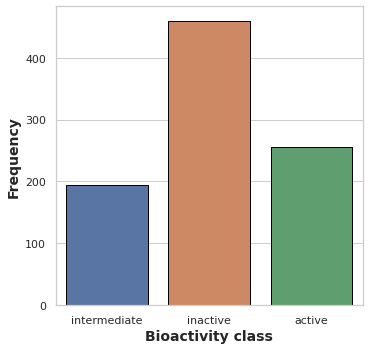

In [15]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('./plots/influenza_bioactivity_class_plot.pdf')

We can see that there is a small amount of **intermediate** bioactivity classified compounds and the biggest class of the compounds is the **inactive**.

**Scatter plot of the Molecular Weight (MW) versus the Partition Coefficient (LogP)**

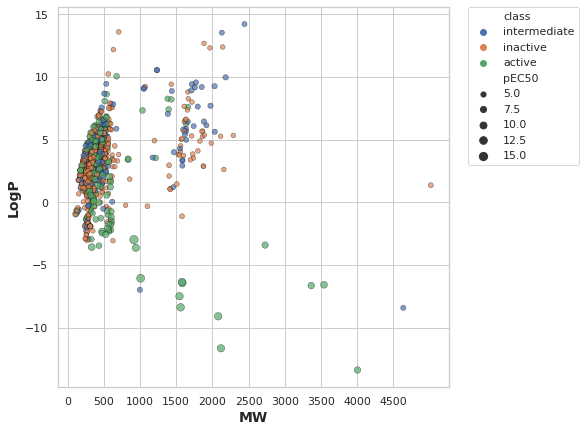

In [16]:
plt.figure(figsize=(7, 7))

ax = sns.scatterplot(x='MW', y='LogP', data=df, hue='class', size='pEC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
ax.set_xticks(range(0,5000,500))

plt.savefig('./plots/influenza_MW_vs_LogP_plot.pdf')

We can see that the majority of the bioactive and bioinactive compounds have a molecular weight of around 500 (our target is < 500) and a relatively equal value for the partition coefficient *LogP*.

### 5. Statistical Analysis

We will be conducting the **Statistical Analysis** via the ***Mann-Whitney U Test***. We will be using this test again as to find whether the two populations derive from each other.

#### 5.1 pEC50 values

In [17]:
do = DataObject(df)
result = do.calculate_mann_whitney(descriptor='pEC50')
result.head()

,Descriptor,Statistics,p,alpha,Interpretation
0,pEC50,0.0,5.693198e-111,0.05,Different distribution (reject H0)


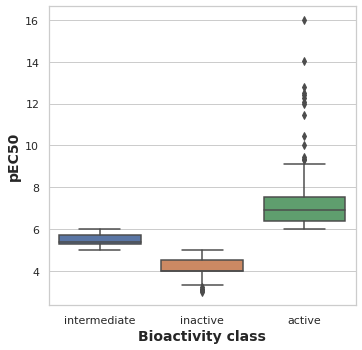

In [19]:
do.visualize_distribution(descriptor='pEC50')

#### 5.2 Molecular Weight (MW)

In [20]:
result = do.calculate_mann_whitney(descriptor='MW')
result.head()

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,51195.0,0.002418,0.05,Different distribution (reject H0)


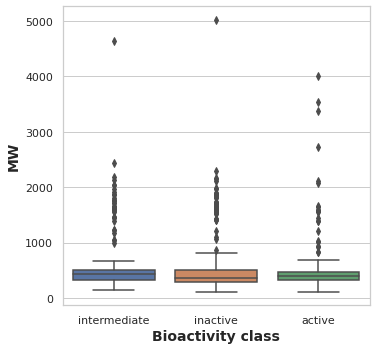

In [21]:
do.visualize_distribution(descriptor='MW')

#### 5.3 Partition Coefficient (LogP)

In [22]:
result = do.calculate_mann_whitney(descriptor='LogP')
result.head()

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,55845.5,0.144596,0.05,Same distribution (fail to reject H0)


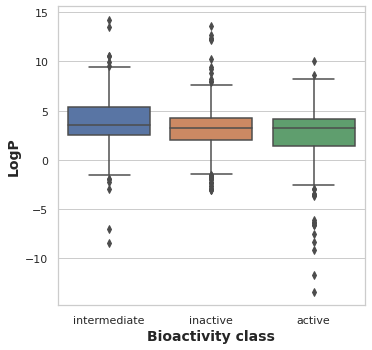

In [23]:
do.visualize_distribution(descriptor='LogP')

#### 5.4 Number of H$^{+}$ Donors (NumHDonors)

In [24]:
result = do.calculate_mann_whitney(descriptor='NumHDonors')
result.head()

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,57911.5,0.388309,0.05,Same distribution (fail to reject H0)


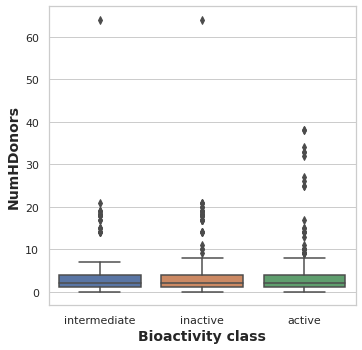

In [25]:
do.visualize_distribution(descriptor='NumHDonors')

#### 5.5 Number of H$^{+}$ Acceptors (NumHAcceptors)

In [26]:
result = do.calculate_mann_whitney(descriptor='NumHAcceptors')
result.head()

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,56739.5,0.233741,0.05,Same distribution (fail to reject H0)


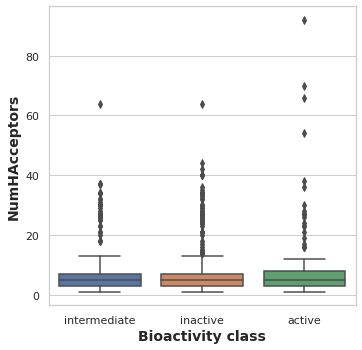

In [27]:
do.visualize_distribution(descriptor='NumHAcceptors')

#### 5.6 Interpretation of Statistical Findings  
*Box Plots*  <br> <br>
*pEC50 values*  
When analyzing the *pEC50 values*, the **active** and **inactive** displayed ***statistically significant difference***, which is expected as we bucketed them according to their *pEC50 values*. This feature is interpreted the same way as with the *matrix protein M2*  <br><br>
*Lipinski descriptors*  
The 4 Lipinski descriptors exhibited ***statistically significant difference*** between the bioactivity classes. Where the distributions are the same, we can conclude that the range of values for all the bioactivity classes orbits around the same values.

### 6. Feature Engineering via Morgan Fingerprint Vector Generation  
We have already processed the data for the decoy matrix consisting of the *5HT1A* receptor. In this chapter we will be generating the **Morgan Vector** only for the *Influenza virus A*.

In [29]:
morgan_matrix = do.generate_morgan_matrix()

0.0% done
54.9% done


Morgan Matrix dimensions: (910, 2048)


We have successfully generated a **Morgan Fingerprint** for the *Influenza virus A* with the best outcome - having the full sample generated (910 entries). Now we will be saving it for future use as a *.csv* file.

In [31]:
pd.DataFrame(morgan_matrix).to_csv('./data/influenza_04_morgan_matrix.csv', index=False)

### 7. Preparing X and Y Matrices  
In this final step, we will be preparing the dependent and independent variables for modelling. This step will denote the end of this extension notebook.

In [34]:
df_X = pd.DataFrame(morgan_matrix)
df_y = pd.read_csv('./data/influenza_03_bioactivity_data_3class_pEC50.csv')['pEC50']
df_combined = pd.concat([df_X, df_y], axis=1)
df_combined.head(10)

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
5  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
7  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
9  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5

Finally, we will be saving this dataset for model building.

In [35]:
df_combined.to_csv('./data/influenza_05_morgan_matrix_fingerprint_pEC50.csv', index=False)

*** 
### Overview
In this extension notebook, we briefly **collected**, **explored**, **cleaned**, **analyzed**, and **prepared** the *Influenza virus A* data for modelling.  
The next notebook will be looking into comparing *supervised ML algorithms*. From this comparison, we will choose the 2 most suitable algorithms to optimize and make predictions upon. Outside of that, we will also look into **RMT (Random Matrix Theory)** and the results that it may yield. We will also be attempting to find better results with **LSTM** or **CNN**.